In [31]:
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Dataset\movies.csv')

In [3]:
#checking for missing columns 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'. format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#changing data types of the budget and gross columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [6]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
df['released_year'] = df['released'].str.extract(r'(\d{4})')


In [8]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
#Dropping company duplicates
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

<Axes: xlabel='budget', ylabel='gross'>

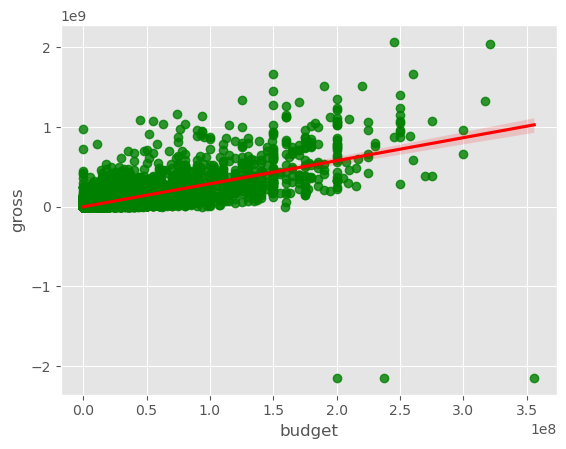

In [11]:
#using seaborn to view correlation between Budget and Gross 
sns.regplot(x='budget', y = 'gross', data = df, scatter_kws = {'color' : 'green'}, line_kws = {'color':'red'})

In [12]:
df.corr(numeric_only=True, method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


In [13]:
#There is a strong positive correlation between Budget and gross
#Movies with High Budget will most likely yield more earning. However, this correlation does not imply causation as other factors can also contribute to a high gross


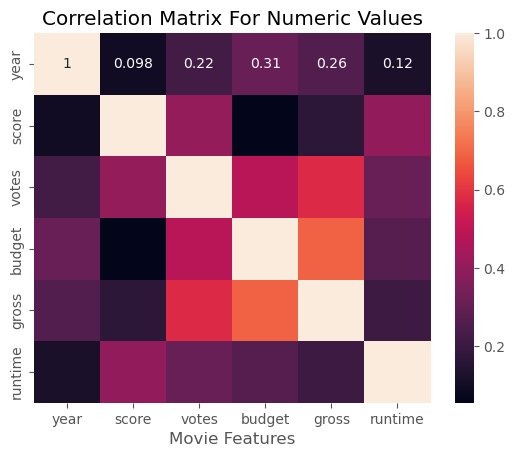

In [14]:
correlation_matrix = df.corr(numeric_only = True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Values')
plt.xlabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [15]:
#finding the correlation between all columns by making all column types the same 
df_numerized = df 
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,39
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,35
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,32


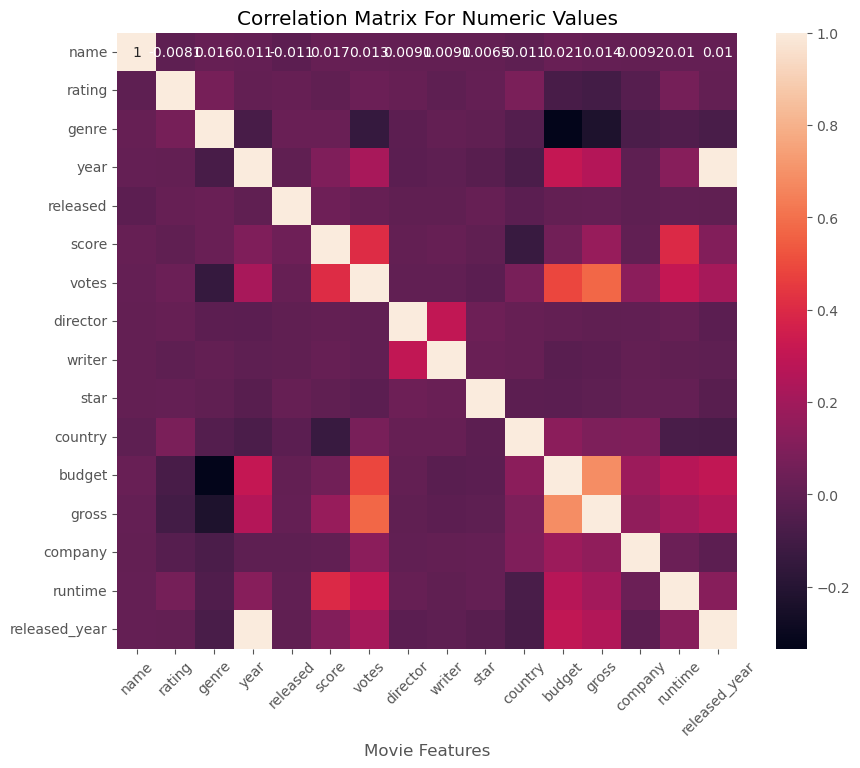

In [34]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)
correlation_matrix = df_numerized.corr(numeric_only = True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Values')
plt.xticks(rotation=45)
plt.xlabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [17]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs>0.5)]
high_corr

votes          gross            0.573889
gross          votes            0.573889
budget         gross            0.687124
gross          budget           0.687124
year           released_year    0.996397
released_year  year             0.996397
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

In [29]:
#votes and Budget  have the highest correlation with gross earnings

NameError: name 'matplotlib' is not defined